<a href="https://colab.research.google.com/github/jithesh9539/Regression_ML/blob/main/Regression_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [166]:
data=pd.read_csv('SpotifyFeatures.csv')

In [167]:
data.head()

genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 18 columns]

In [168]:
data.describe()

popularity   acousticness  ...          tempo        valence
count  232725.000000  232725.000000  ...  232725.000000  232725.000000
mean       41.127502       0.368560  ...     117.666585       0.454917
std        18.189948       0.354768  ...      30.898907       0.260065
min         0.000000       0.000000  ...      30.379000       0.000000
25%        29.000000       0.037600  ...      92.959000       0.237000
50%        43.000000       0.232000  ...     115.778000       0.444000
75%        55.000000       0.722000  ...     139.054000       0.660000
max       100.000000       0.996000  ...     242.903000       1.000000

[8 rows x 11 columns]

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [170]:
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [171]:
print(data.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


**Visualization of Popularity Distribution**

Text(0.5, 1.0, 'Popularity Distribution')

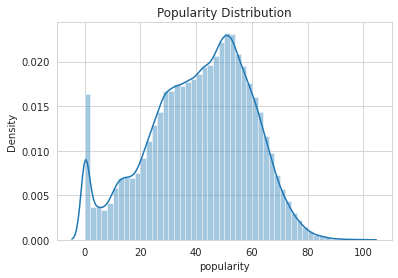

In [172]:
sns.distplot(data['popularity']).set_title('Popularity Distribution')

**Finding Correlation of the Dataset**

In [173]:
data.corr()

popularity  acousticness  ...     tempo   valence
popularity          1.000000     -0.381295  ...  0.081039  0.060076
acousticness       -0.381295      1.000000  ... -0.238247 -0.325798
danceability        0.256564     -0.364546  ...  0.021939  0.547154
duration_ms         0.002348      0.011203  ... -0.028456 -0.141811
energy              0.248922     -0.725576  ...  0.228774  0.436771
instrumentalness   -0.210983      0.316154  ... -0.104133 -0.307522
liveness           -0.167995      0.069004  ... -0.051355  0.011804
loudness            0.363011     -0.690202  ...  0.228364  0.399901
speechiness        -0.151076      0.150935  ... -0.081541  0.023842
tempo               0.081039     -0.238247  ...  1.000000  0.134857
valence             0.060076     -0.325798  ...  0.134857  1.000000

[11 rows x 11 columns]

Text(0.5, 1.0, 'Popularity Based on Time')

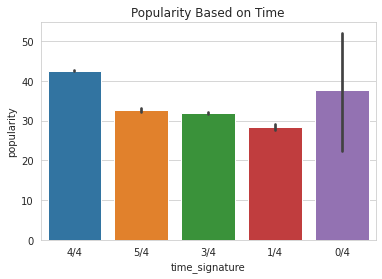

In [174]:
sns.barplot(x = 'time_signature', y = 'popularity', data = data)
plt.title('Popularity Based on Time')

Text(0.5, 1.0, 'Popularity Based on Key')

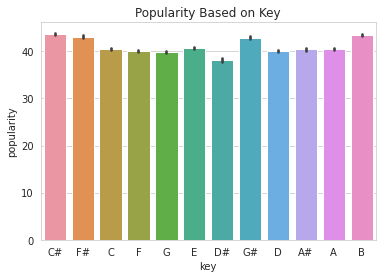

In [175]:
sns.barplot(x = 'key', y = 'popularity', data = data)
plt.title('Popularity Based on Key')

**Popularity based on mode**

Text(0.5, 1.0, 'Popularity Based on Mode')

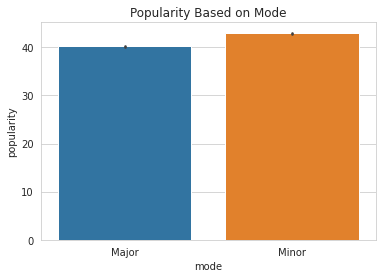

In [176]:
sns.barplot(x = 'mode', y = 'popularity', data = data)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

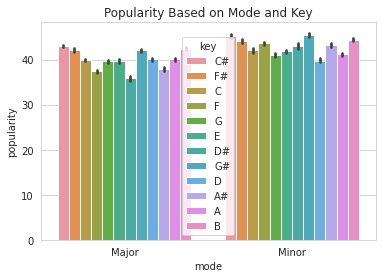

In [177]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = data)
plt.title('Popularity Based on Mode and Key')

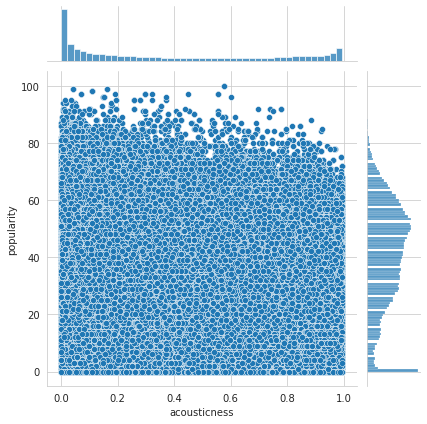

In [178]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = data)

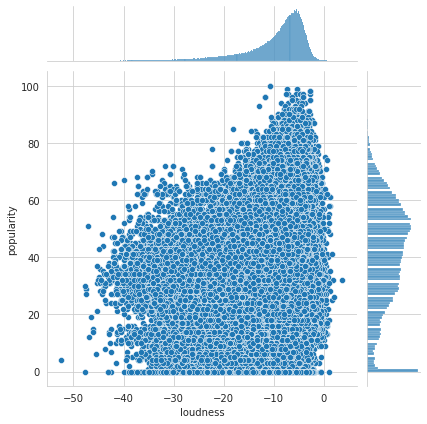

In [179]:
sns.jointplot(x = 'loudness', y = 'popularity', data = data)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

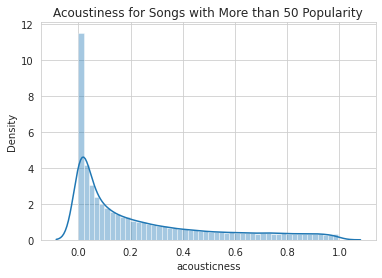

In [180]:
popular_above_50 = data[data.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

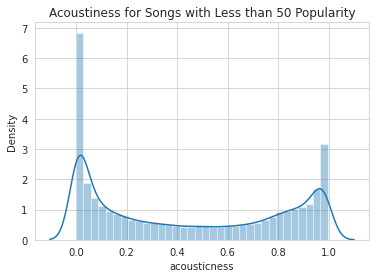

In [181]:
popular_below_50 = data[data.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

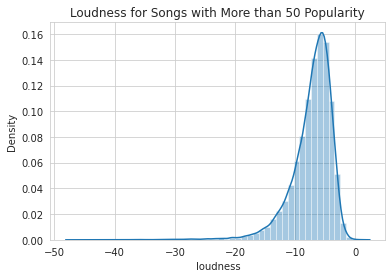

In [182]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

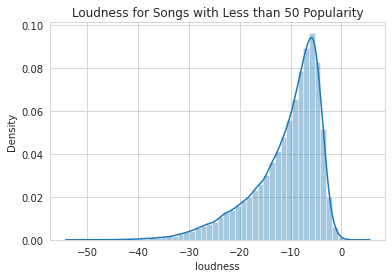

In [183]:
popular_below_50 = data[data.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

**From this analysis, there loudness" and acousticness features have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acousticness differ for songs with more than 50 popularity vs. songs with less than 50 popularity. We plot a summary of all relationships between the features.**

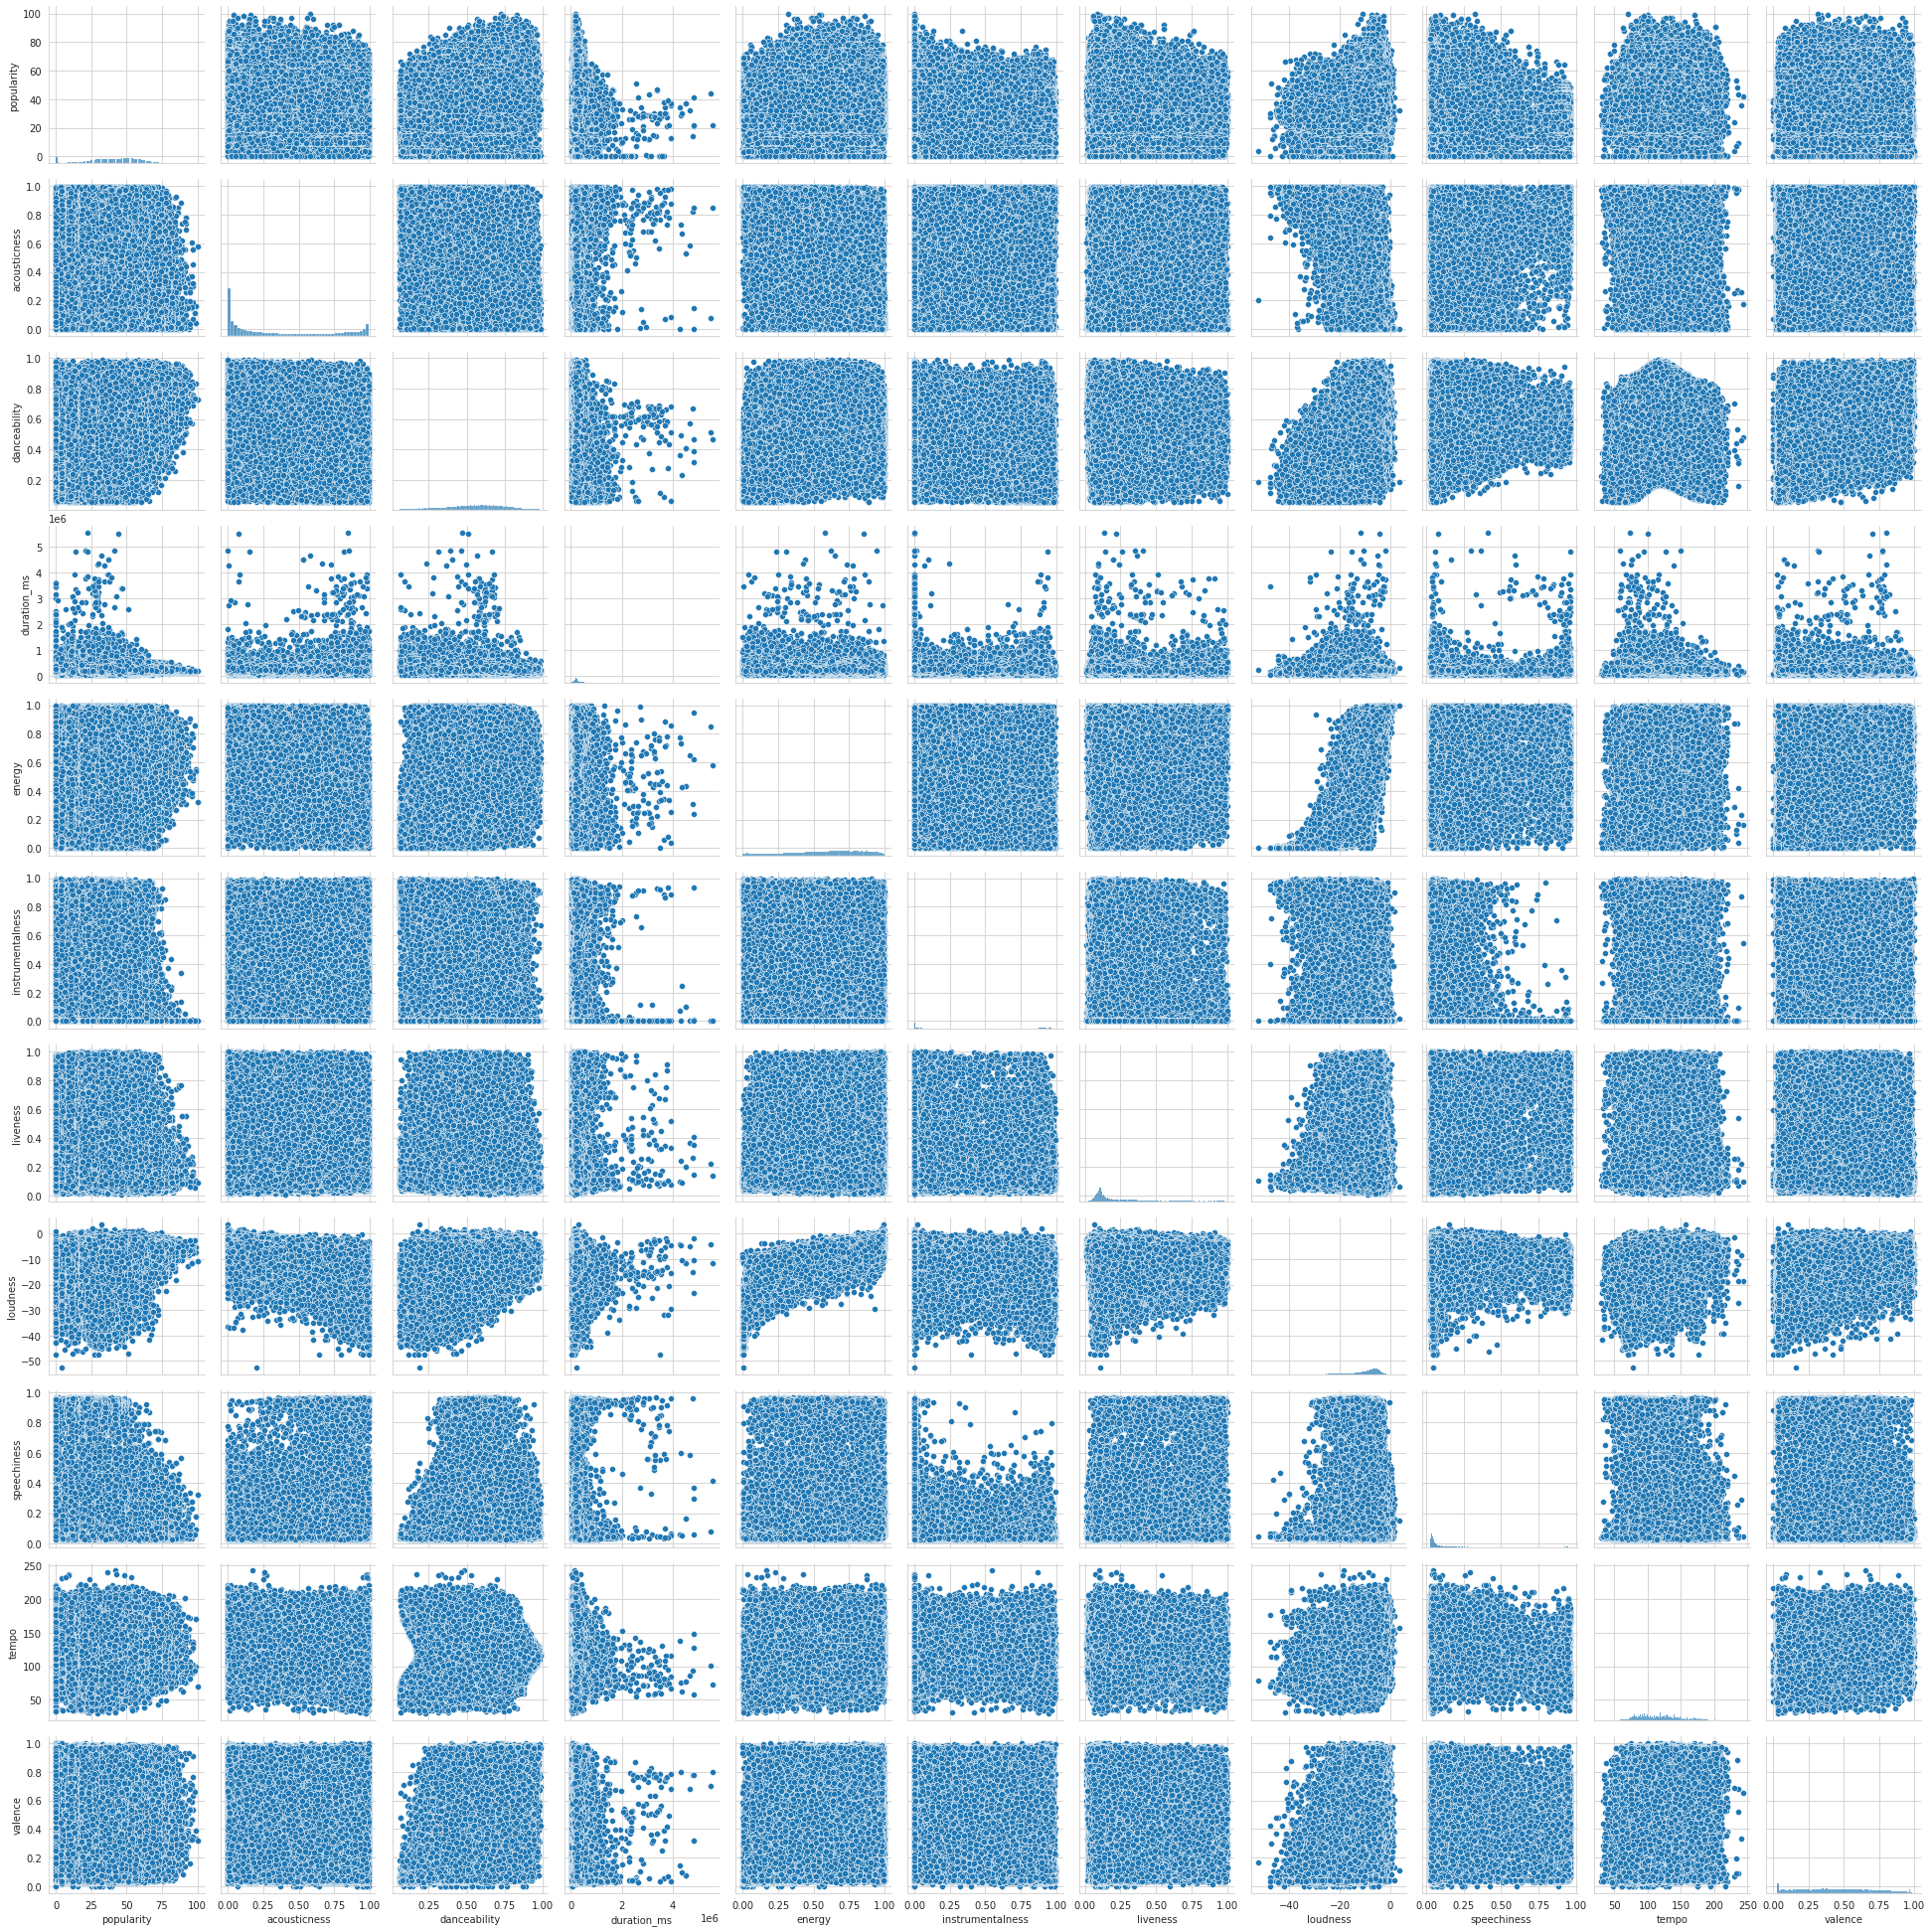

In [184]:
 sns.pairplot(data)

**There are 3 categorical variables (key, mode, and time signature) that need to be converted from text to numbers using one-hot-encoding. We also define popularity as a binary variable. For our purposes, we will define above 57 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0.**

**Key: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12.**

In [185]:
list_of_keys = data['key'].unique()
for i in range(len(list_of_keys)):
    data.loc[data['key'] == list_of_keys[i], 'key'] = i
data.sample(5)

genre      artist_name  ... time_signature valence
72486   Children's Music    Hushabye Baby  ...            4/4   0.370
130109         Classical  Antonio Vivaldi  ...            1/4   0.608
86498                R&B      James Blake  ...            4/4   0.231
222678              Rock     Tom Cochrane  ...            4/4   0.754
17100              Dance      The Bangles  ...            3/4   0.400

[5 rows x 18 columns]

**Mode: We will assign major = 1 and minor = 0.**

In [186]:
data.loc[data["mode"] == 'Major', "mode"] = 1
data.loc[data["mode"] == 'Minor', "mode"] = 0
data.sample(5)

genre             artist_name  ... time_signature valence
63833          Folk              Jon Bryant  ...            4/4   0.149
181081         Jazz          Brenda Russell  ...            4/4   0.665
153406         Rock              Jack White  ...            4/4   0.680
163307    Reggaeton  Galante "El Emperador"  ...            4/4   0.854
13377   Alternative                  Avatar  ...            4/4   0.657

[5 rows x 18 columns]

In [187]:
list_of_time_signatures = data['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    data.loc[data['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
data.sample(5)

genre       artist_name  ... time_signature valence
20871        Dance            Miguel  ...              0  0.5190
197561  Soundtrack     John Williams  ...              0  0.0666
118160         Rap             Lloyd  ...              2  0.4580
150025         Pop        Macklemore  ...              0  0.5690
178172        Jazz  Bobby Hutcherson  ...              2  0.2290

[5 rows x 18 columns]

In [188]:
data['key']=data['key'].astype(str).astype(int)
data['mode']=data['mode'].astype(str).astype(int)
data['time_signature']=data['time_signature'].astype(str).astype(int)

print(data.dtypes)

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object


**Popularity**

In [189]:
data.loc[data['popularity'] < 57, 'popularity'] = 0 
data.loc[data['popularity'] >= 57, 'popularity'] = 1
data.loc[data['popularity'] == 1]

genre     artist_name  ... time_signature valence
135      R&B   Mary J. Blige  ...              0  0.6930
136      R&B         Rihanna  ...              2  0.3230
137      R&B       Yung Bleu  ...              0  0.0862
138      R&B        Surfaces  ...              0  0.7680
139      R&B  Olivia O'Brien  ...              0  0.4660
...      ...             ...  ...            ...     ...
230312  Soul     James Brown  ...              0  0.8580
230782  Soul    Alex Hepburn  ...              0  0.6130
230817  Soul    Paloma Faith  ...              0  0.5660
230946  Soul     James Brown  ...              0  0.9140
231493  Soul      Simply Red  ...              0  0.6410

[49104 rows x 18 columns]

**7. Model Fitting and Predicting**

For simplicity and using binary classification, we define as the top 25% popular songs as "popular", and the bottom 75% popular songs as "not popular".

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

**For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.**

In [191]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

**Next we define 80% of the dataframe for training and 20% of the dataframe for testing.**

In [192]:
training = data.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = data.drop(training.index)[features]

**We add a validation dataset using train_test_split.**

In [193]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

**RandomForest**

In [194]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.9209635836287464
AUC: 0.8322640333930955


**K-NN**

In [195]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7735524760983994
AUC: 0.6154249990048827


**XGBoost**

In [196]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_valid)
  
XGB_Accuracy = accuracy_score(y_valid, xgb_yhat)
print("Accuracy: " + str(XGB_Accuracy))

XGB_AUC = roc_auc_score(y_valid, xgb_yhat) 
print("AUC: " + str(XGB_AUC))

Accuracy: 0.7919486518423031
AUC: 0.5172997510420607


**8. Model Performance Summary**

In [197]:
#model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
#                                                     'RandomForestClassifier', 
#                                                      'KNeighborsClassifier',
#                                                      'DecisionTreeClassifier',
#                                                      'LinearSVC',
#                                                      'XGBClassifier'],
#                                            'Accuracy': [LR_Accuracy,
#                                                         RFC_Accuracy,
#                                                         KNN_Accuracy,
#                                                         DT_Accuracy,
#                                                         LSVC_Accuracy,
#                                                         XGB_Accuracy]})


#model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
#                                                      'RandomForestClassifier', 
#                                                      'KNeighborsClassifier',
#                                                      'DecisionTreeClassifier',
#                                                      'LinearSVC',
#                                                      'XGBClassifier'],
##                                            'AUC': [LR_AUC,
 #                                                        RFC_AUC,
 #                                                        KNN_AUC,
 #                                                        DT_AUC,
 #                                                        LSVC_AUC,
 #                                                        XGB_AUC]})

 

In [198]:
#model_performance_accuracy.sort_values(by = "Accuracy", ascending = False

In [199]:
#model_performance_AUC.sort_values(by = "AUC", ascending = False)

Conclusion

Using a dataset of 228,000 Spotify Tracks, we were able to predict popularity (greater than 57 popularity) using audio-based metrics such as key, mode, and danceability without external metrics such as artist name, genre, and release date. The Random Forest Classifier was the best performing algorithm with 92.0% accuracy and 86.4% AUC. The Decision Tree Classifier was the second best performing algorithm with 87.5% accuracy and 85.8% AUC.